In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

C:\Users\Skinny\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data = np.array(list(np.loadtxt("train1.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label2.csv", delimiter=","))).astype("int")
eval_data = np.array(list(np.loadtxt("eval1.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label2.csv", delimiter=","))).astype("int")

x_train = train_data.reshape(-1, 24, 24, 1)
x_val = eval_data.reshape(-1, 24, 24, 1)

y_train = to_categorical(train_labels)
y_val = to_categorical(eval_labels)

print(y_train[0])

[1. 0. 0.]


In [3]:
model = Sequential()

model.add(Flatten(input_shape = (24, 24, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [4]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [6]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [7]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:,:,:], y_val[:,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 19s - loss: 0.1391 - acc: 0.9579 - val_loss: 0.0352 - val_acc: 0.9827
Epoch 2/20
 - 2s - loss: 0.0261 - acc: 0.9928 - val_loss: 0.0215 - val_acc: 0.9913
Epoch 3/20
 - 2s - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/20
 - 2s - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0118 - val_acc: 0.9975
Epoch 5/20
 - 2s - loss: 0.0093 - acc: 0.9979 - val_loss: 0.0057 - val_acc: 0.9988
Epoch 6/20
 - 2s - loss: 0.0063 - acc: 0.9986 - val_loss: 6.1994e-04 - val_acc: 1.0000
Epoch 7/20
 - 2s - loss: 0.0084 - acc: 0.9976 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 8/20
 - 2s - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0040 - val_acc: 0.9988
Epoch 9/20
 - 2s - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 10/20
 - 2s - loss: 0.0041 - acc: 0.9995 - val_loss: 0.0062 - val_acc: 0.9988
Epoch 11/20
 - 2s - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 12/20
 - 3s - loss: 0.0019 - acc: 0.9996 - val_loss: 1.7864e-04 - val_acc:

In [8]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0017, final accuracy: 1.0000


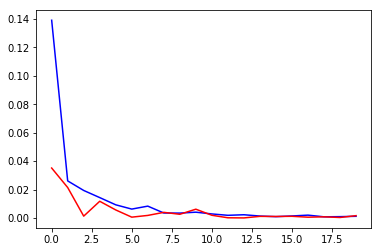

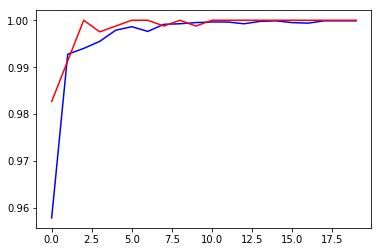

In [9]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [10]:
y_hat = model.predict(x_val)
print(np.shape(y_hat))
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

(808, 3)
[[303   0   0]
 [  0 303   0]
 [  0   0 202]]


In [11]:
mnist_testset = np.loadtxt('test1.csv', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 24, 24, 1)

In [12]:
y_hat = model.predict(x_test, batch_size=64)

In [13]:
y_pred = np.argmax(y_hat,axis=1)
print(np.shape(y_hat))

(5400, 3)


[100 100 100 ...   0   0   0]


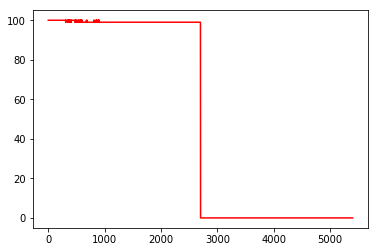

In [21]:
p=np.array(100*y_hat,dtype=int)
print(p[:,0])
plt.plot(p[:,0],color='r')

plt.show()